In [1]:

# Polynomial Fit for multiple lines of data
import numpy as np
import json
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit


/home/zli85/miniconda3/envs/oecsim/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
plt_config = {
    'Vegas': {'label': 'Las Vegas', 'color': '#90829E', 'marker': 'o'},
    'Paris': {'label': 'Paris', 'color': '#C5EDD2', 'marker': 's'},
    'Shanghai': {'label': 'Shanghai', 'color': '#87C5E6', 'marker': '^'},
    'Khartoum': {'label': 'Khartoum', 'color': '#F6E9CB', 'marker': 'D'},
    '1615E-1206N': {'label': 'Chengdu West', 'color': '#90829E', 'marker': 'o'},
    '1617E-1207N': {'label': 'Chengdu East', 'color': '#90829E', 'marker': '.'},
    '0760E-0887N': {'label': 'São Paulo', 'color': '#C5EDD2', 'marker': 's'},
    '0368E-1245N': {'label': 'Las Vegas', 'color': '#87C5E6', 'marker': '^'},
    '0571E-1075N': {'label': 'Toronto', 'color': '#F6E9CB', 'marker': 'D'},
}

In [3]:

# get training curves
# training_curves_file_path = 'training_curves_spacenet2.json'
training_curves_file_path = 'training_curves_spacenet7.json'
# training_curves_file_path = 'training_curves_spacenet2_pruned_unet.json'
with open(training_curves_file_path) as f:
    training_curves = json.load(f)

In [4]:
# get average of all training curves
average_num_images_list = np.mean([training_curve['number_of_images_list'] for training_curve in training_curves], axis=0)
average_accuracy_list = np.mean([training_curve['performance_list'] for training_curve in training_curves], axis=0)
print(average_num_images_list)
print(average_accuracy_list)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.
 210. 215. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270. 275.
 280. 285. 290. 295. 300. 305. 310. 315. 320. 325. 330. 335. 340. 345.
 350. 355. 360. 365. 370. 375. 380. 385. 390. 395. 400. 405. 410. 415.
 420. 425. 430. 435. 440. 445. 450. 455. 460. 465. 470. 475. 480. 485.
 490. 495. 500. 505. 510. 515. 520. 525. 530. 535. 540. 545. 550. 555.
 560. 565. 570. 575. 580. 585. 590. 595. 600. 605. 610. 615. 620. 625.
 630. 635. 640. 645. 650. 655. 660. 665. 670. 675. 680. 685. 690. 695.
 700. 705. 710. 715. 720. 725. 730. 735. 740. 745. 750.]
[0.         0.         0.05376753 0.20603689 0.18612639 0.17615839
 0.15921248 0.16918307 0.17876265 0.19293623 0.20686466 0.2097609
 0.22502939 0.23421284 0.2452363  0.2566021  0.24583093 0.25131948
 0.24931214 0.26826865 0.27021629

In [5]:
# Placeholder extension for up to 100 rounds, with random fluctuations for visualization
x_data = average_num_images_list
y_data = average_accuracy_list

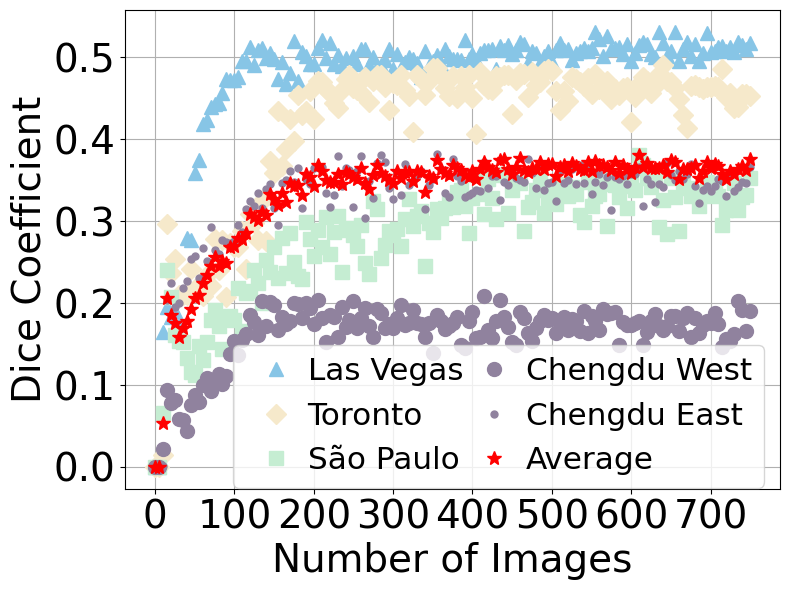

In [6]:
# plot the original data and the polynomial fit
plt.figure(figsize=(8, 6))
font_size = 28
markersize = 10
# sort training curves by location
training_curves = sorted(training_curves, key=lambda x: x['location'])
for training_curve in training_curves:
    location = training_curve['location']
    label = plt_config[location]['label']
    color = plt_config[location]['color']
    marker = plt_config[location]['marker']
    plt.plot(training_curve['number_of_images_list'], training_curve['performance_list'], marker, label=label, color=color, markersize=markersize)

# plot the average data
plt.plot(x_data, y_data, '*', label='Average', markersize=markersize, color='red')

# plt.plot(x_data, y_fitted, label=f'Polynomial Fit (degree={poly_degree})', linestyle='--')
plt.xlabel('Number of Images', fontsize=font_size)
plt.ylabel('Dice Coefficient', fontsize=font_size)
# plt.title('Polynomial Fit to Data from Image')
plt.legend(fontsize=font_size * 0.8, ncol=2, columnspacing=0.01, handletextpad=0.01, labelspacing=0.5, loc='lower right', bbox_to_anchor=(1, -0.03))
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.grid(True)
plt.tight_layout()
plt.savefig('training_curves.pdf')

In [7]:
# Fit a polynomial model to the data (degree 5)
poly_degree = 5
coeffs = np.polyfit(x_data, y_data, poly_degree)
polynomial_fit = np.poly1d(coeffs)

# Generate fitted values
poly_y_fitted_5 = polynomial_fit(x_data)

# get the coefficients of the polynomial
p = Polynomial(coeffs[::-1])  # Reverse the coefficients for Polynomial class
coeffs_str = ', '.join(f'{c:.3f}' for c in p.coef)
print(f'Polynomial coefficients: {coeffs_str}')
print(f'Polynomial: {p}')

Polynomial coefficients: 0.055, 0.004, -0.000, 0.000, -0.000, 0.000
Polynomial: 0.05488259 + 0.00371186·x - (1.81047107e-05)·x² + (4.31028326e-08)·x³ -
(4.92517601e-11)·x⁴ + (2.15473582e-14)·x⁵


In [8]:
# Fit a polynomial model to the data (degree 3)
poly_degree = 3
coeffs = np.polyfit(x_data, y_data, poly_degree)
polynomial_fit = np.poly1d(coeffs)

# Generate fitted values
poly_y_fitted_3 = polynomial_fit(x_data)

# get the coefficients of the polynomial
p = Polynomial(coeffs[::-1])  # Reverse the coefficients for Polynomial class
coeffs_str = ', '.join(f'{c:.3f}' for c in p.coef)
print(f'Polynomial coefficients: {coeffs_str}')
print(f'Polynomial: {p}')

Polynomial coefficients: 0.112, 0.002, -0.000, 0.000
Polynomial: 0.11227614 + 0.00185987·x - (4.19224348e-06)·x² + (2.93693214e-09)·x³


In [9]:
# Fit a logtistic model to the data
# Define a logistic function for fitting
def logistic_func(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Initial guesses for the parameters (L, k, x0)
initial_guess = [1, 0.1, 100]

# Fit the logistic function to the data
params, _ = curve_fit(logistic_func, x_data, y_data, p0=initial_guess)

# Generate fitted values using the optimized parameters
y_fitted_logistic = logistic_func(x_data, *params)

# print the function parameters
print('Logistic Function Parameters: L = %.3f, k = %.3f, x0 = %.3f' % (params[0], params[1], params[2]))

Logistic Function Parameters: L = 0.363, k = 0.022, x0 = 45.618


In [10]:
# Fit a log model to the data
# Define a logarithmic function for fitting
def log_func(x, a, b, c, d, eps=1e-6):
    return a * np.log(b * x + c + eps) + d

# Initial guesses for the parameters (a, b, c)
initial_guess_log = [1, 0.1, 0.1, 0.1]

# Fit the logarithmic function to the data
params_log, _ = curve_fit(log_func, x_data, y_data, p0=initial_guess_log)

# Generate fitted values using the optimized parameters
y_fitted_logarithmic = log_func(x_data, *params_log)

# print the function parameters
print('Logarithmic Function Parameters: a = %.3f, b = %.3f, c = %.3f, d = %.3f' % (params_log[0], params_log[1], params_log[2], params_log[3]))

Logarithmic Function Parameters: a = 0.060, b = 0.678, c = 0.508, d = 0.021


/tmp/ipykernel_4090840/1077791935.py:4: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + c + eps) + d


In [11]:
def compute_r_squared(y_data, y_fitted):
    # Compute the total sum of squares
    y_mean = np.mean(y_data)
    ss_total = np.sum((y_data - y_mean) ** 2)
    # Compute the residual sum of squares
    ss_res = np.sum((y_data - y_fitted) ** 2)
    # Compute the R-squared value
    r_squared = 1 - (ss_res / ss_total)
    return r_squared

In [12]:
# compute the R^2 value for the polynomial fit (degree 5)
r_squared_5 = compute_r_squared(y_data, poly_y_fitted_5)
# compute the R^2 value for the polynomial fit (degree 3)
r_squared_3 = compute_r_squared(y_data, poly_y_fitted_3)
# compute the R^2 value for the logistic fit
r_squared_logistic = compute_r_squared(y_data, y_fitted_logistic)
# compute the R^2 value for the logarithmic fit
r_squared_logarithmic = compute_r_squared(y_data, y_fitted_logarithmic)
print('R^2 value for the polynomial fit (degree 5): %.3f' % r_squared_5)
print('R^2 value for the polynomial fit (degree 3): %.3f' % r_squared_3)
print('R^2 value for the logistic fit: %.3f' % r_squared_logistic)
print('R^2 value for the logarithmic fit: %.3f' % r_squared_logarithmic)

R^2 value for the polynomial fit (degree 5): 0.950
R^2 value for the polynomial fit (degree 3): 0.899
R^2 value for the logistic fit: 0.932
R^2 value for the logarithmic fit: 0.874


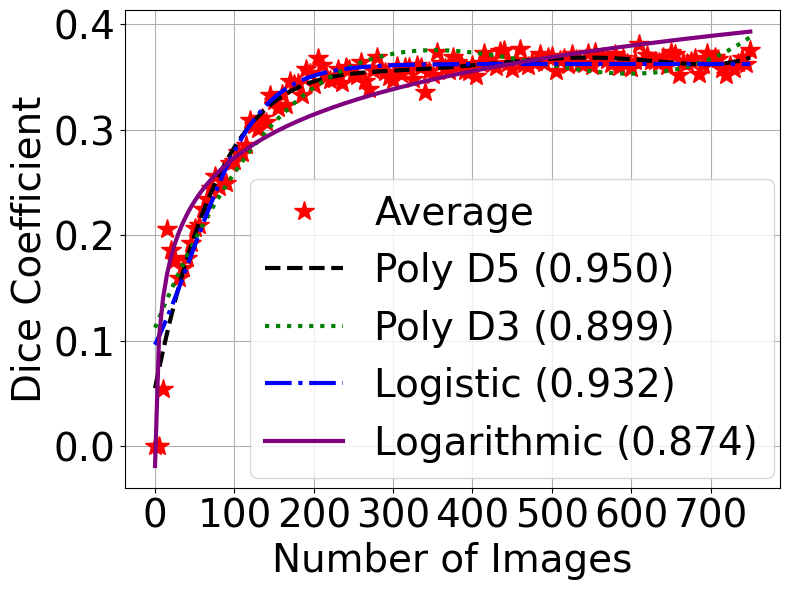

In [23]:

# Plot the data and the fitted models
plt.figure(figsize=(8, 6))
font_size = 28
line_width = 3
marker_size = 15
plt.plot(x_data, y_data, '*', label='Average', color='red', markersize=marker_size)
# plot fit curves
# labels are shown with the R^2 values (keep only 3 decimal places)
plt.plot(x_data, poly_y_fitted_5, label=f'Poly D5 ({r_squared_5:.3f})', linestyle='--', linewidth=line_width, color='black')
plt.plot(x_data, poly_y_fitted_3, label=f'Poly D3 ({r_squared_3:.3f})', linestyle=':', linewidth=line_width, color='green')
plt.plot(x_data, y_fitted_logistic, label=f'Logistic ({r_squared_logistic:.3f})', linestyle='-.', linewidth=line_width, color='blue')
plt.plot(x_data, y_fitted_logarithmic, label=f'Logarithmic ({r_squared_logarithmic:.3f})', linestyle='-', linewidth=line_width, color='purple')
plt.legend(fontsize=font_size, loc='lower right', bbox_to_anchor=(1.02, -0.02))
plt.xlabel('Number of Images', fontsize=font_size)
plt.ylabel('Dice Coefficient', fontsize=font_size)
# plt.title('Polynomial Fit for multiple lines of data')
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.tight_layout()
plt.grid(True)
plt.savefig('polynomial_fit_multiple_lines.pdf')